<a href="https://colab.research.google.com/github/kimtaehyeokkkk/python/blob/main/202201055_%EA%B9%80%ED%83%9C%ED%98%81_%EC%8B%AC%EC%9E%A5%EB%B3%91_1%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart disease classification dataset.csv to heart disease classification dataset (23).csv
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 400)               3200      
                                                                 
 dropout_40 (Dropout)        (None, 400)               0         
                                                                 
 dense_82 (Dense)            (None, 400)               160400    
                                                                 
 dropout_41 (Dropout)        (None, 400)               0         
                                                                 
 dense_83 (Dense)            (None, 40)                16040     
                                                                 
 dense_84 (Dense)            (None, 1)                 41        
                      

<function matplotlib.pyplot.show(*args, **kw)>

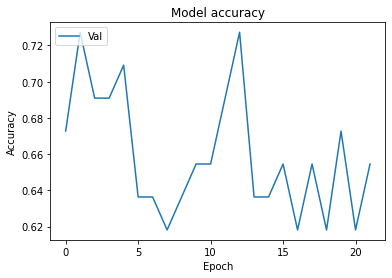

In [ ]:
#1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED) 
scaler = StandardScaler()

from google.colab import files
myfile = files.upload()

Data = pd.read_csv('heart disease classification dataset.csv')

df = Data

df.isnull().sum().sort_values(ascending=False).head(20) 
df = pd.get_dummies(df) 
df = df.fillna(df.mean()) 

#2
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('target_yes', ascending=False)

df_corr_sort['target_yes'].head(10)

cols_train = ['cp', 'thalach', 'slope', 'sex_female', 'sex_male', 'restecg', 'fbs']
x_train_pre = df[cols_train]
standardized_data = scaler.fit_transform(x_train_pre)

y = df['target_yes'].values

#3
x_train, x_test, y_train, y_test = train_test_split(standardized_data, y, test_size = 0.1) 

#4
model = Sequential()
model.add(Dense(400, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(400, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

#5
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 20)

modelpath = './data/model/any'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_accuracy', verbose = 0, save_best_only = True)

history = model.fit(x_train, y_train, validation_split = 0.2, epochs= 200, batch_size = 3, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(x_train, y_train)
print('val accuracy: ', score[1])

plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Val', 'Train'], loc = 'upper left')
plt.show

Epoch 1/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0308 - accuracy: 0.9583 - val_loss: 0.4596 - val_accuracy: 0.8571
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.9583 - val_loss: 0.4231 - val_accuracy: 0.8571
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0258 - accuracy: 0.9583 - val_loss: 0.4123 - val_accuracy: 0.8571
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.4478 - val_accuracy: 0.8571
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.9167 - val_loss: 0.4705 - val_accuracy: 0.8571
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9167 - val_loss: 0.4383 - val_accuracy: 0.8571
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 0.0278 - accuracy: 0.9583 - val_loss: 0.4269 - val_accuracy: 0.8571
Epoch 8/200
8/8 [=========

<function matplotlib.pyplot.show(*args, **kw)>

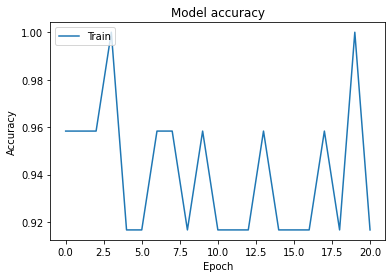

In [ ]:
#6
history = model.fit(x_test, y_test, validation_split = 0.2, epochs= 200, batch_size = 3, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(x_test, y_test)
print('accuracy: ', score[1])

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show